<a href="https://colab.research.google.com/github/muskanvarmaa/Internboot/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('/content/train_cleaned.csv')
train['date'] = pd.to_datetime(train['date'])


In [ ]:
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['weekday'] = train['date'].dt.weekday
print(train.head())


   id       date  store_nbr      family  sales  onpromotion  month  day  year  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0          0.0      1    1  2013   
1   1 2013-01-01          1   BABY CARE    0.0          0.0      1    1  2013   
2   2 2013-01-01          1      BEAUTY    0.0          0.0      1    1  2013   
3   3 2013-01-01          1   BEVERAGES    0.0          0.0      1    1  2013   
4   4 2013-01-01          1       BOOKS    0.0          0.0      1    1  2013   

   weekday  
0        1  
1        1  
2        1  
3        1  
4        1  


In [ ]:
train['is_weekend'] = train['weekday'].apply(lambda x: 1 if x >= 5 else 0)
holidays = pd.read_csv('/content/holidays_events.csv')
holidays['date'] = pd.to_datetime(holidays['date'])
holidays['is_holiday'] = 1
train = train.merge(holidays[['date', 'is_holiday']], on='date', how='left')
train['is_holiday'] = train['is_holiday'].fillna(0)
print(train[['date', 'weekday', 'is_weekend', 'is_holiday']].head(10))


        date  weekday  is_weekend  is_holiday
0 2013-01-01        1           0         1.0
1 2013-01-01        1           0         1.0
2 2013-01-01        1           0         1.0
3 2013-01-01        1           0         1.0
4 2013-01-01        1           0         1.0
5 2013-01-01        1           0         1.0
6 2013-01-01        1           0         1.0
7 2013-01-01        1           0         1.0
8 2013-01-01        1           0         1.0
9 2013-01-01        1           0         1.0


In [ ]:
train = train.sort_values(by=['store_nbr', 'family', 'date'])
train['lag_7'] = train.groupby(['store_nbr', 'family'])['sales'].shift(7)
train['lag_30'] = train.groupby(['store_nbr', 'family'])['sales'].shift(30)
print(train[['date', 'sales', 'lag_7', 'lag_30']].head(15))


            date  sales  lag_7  lag_30
0     2013-01-01    0.0    NaN     NaN
1782  2013-01-02    2.0    NaN     NaN
3564  2013-01-03    3.0    NaN     NaN
5346  2013-01-04    3.0    NaN     NaN
7128  2013-01-05    5.0    NaN     NaN
8910  2013-01-06    2.0    NaN     NaN
10692 2013-01-07    0.0    NaN     NaN
12474 2013-01-08    2.0    0.0     NaN
14256 2013-01-09    2.0    2.0     NaN
16038 2013-01-10    2.0    3.0     NaN
17820 2013-01-11    3.0    3.0     NaN
19602 2013-01-12    2.0    5.0     NaN
21384 2013-01-13    2.0    2.0     NaN
23166 2013-01-14    2.0    0.0     NaN
24948 2013-01-15    1.0    2.0     NaN


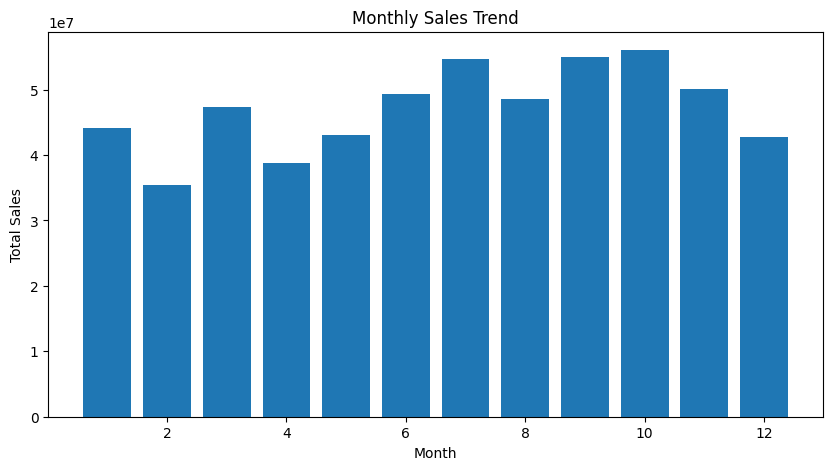

In [ ]:
monthly_sales = train.groupby('month')['sales'].sum()
plt.figure(figsize=(10,5))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


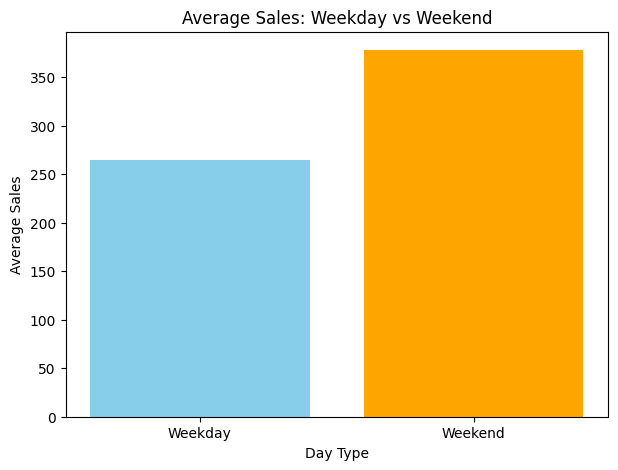

In [ ]:
weekend_sales = train.groupby('is_weekend')['sales'].mean()
plt.figure(figsize=(7,5))
plt.bar(weekend_sales.index, weekend_sales.values, color=['skyblue','orange'])
plt.xticks([0,1], ['Weekday','Weekend'])
plt.title('Average Sales: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Average Sales')
plt.show()


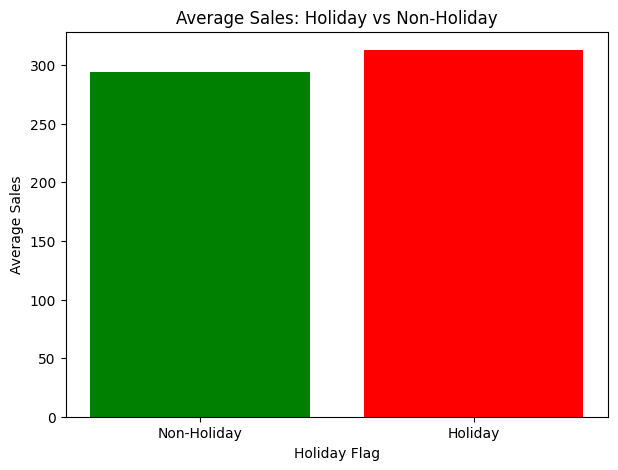

In [ ]:
holiday_sales = train.groupby('is_holiday')['sales'].mean()
plt.figure(figsize=(7,5))
plt.bar(holiday_sales.index, holiday_sales.values, color=['green','red'])
plt.xticks([0,1], ['Non-Holiday','Holiday'])
plt.title('Average Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Sales')
plt.show()


In [ ]:
train.to_csv('/content/train_feature_engineered.csv', index=False)
print("✅ Feature engineered data saved successfully!")


✅ Feature engineered data saved successfully!
